In [ ]:
directory = ["Dataset_complete/Trackpictures/nice_weather/nice_weather_thusis_filisur_20200827_pixelated/",
        "Dataset_complete/Trackpictures/nice_weather/nice_weather_filisur_thusis_20200824_pixelated/",
       "Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/",
       "Dataset_complete/Trackpictures/bad_weather/bad_weather_thusis_filisur_20200829_pixelated/"]

files = ['nice_weather_thusis_filisur.csv', 'nice_weather_filisur_thusis.csv','night_thusis_filisur.csv',
         'bad_weather_thusis_filisur.csv']

In [ ]:
import os
import piexif
import csv

for dir_,file_ in zip(directory,files):#print(dir_)
    with open(file_,'w') as f1:
        writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
        for filename in os.listdir(dir_):
            if filename.endswith(".jpg"):
                input_ = []
                input_.append(dir_+filename)
                exif_dict = piexif.load(dir_+filename)
                for tag in exif_dict["GPS"]:
                    if(piexif.TAGS["GPS"][tag]["name"] in ["GPSLatitude","GPSLongitude","GPSAltitude"]):
                        input_.append(exif_dict["GPS"][tag][0]/1000000.0)
                writer.writerow(input_)



In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

for file_ in files:
    scaler = StandardScaler()
    df = pd.read_csv(file_,header=None,sep="\t")
    data = scaler.fit_transform(df.iloc[:,1:3].values)
    df[4] = data[:,0]
    df[5] = data[:,1]
    df.columns = ['path', 'latitude', 'longitude', 'altitude', 'std_latitude','std_longitude']
    df.to_csv(file_,index=False,sep="\t")

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])

In [537]:
import pandas as pd

day = pd.read_csv("nowyouseeme/data/nice_weather_thusis_filisur.csv")
night = pd.read_csv("nowyouseeme/data/night_thusis_filisur.csv")

In [538]:
day

,path,latitude,longitude,altitude,std_latitude,std_longitude
0,Dataset_complete/Trackpictures/nice_weather/ni...,46.699552,9.440351,703.185,1.716624,-1.723879
1,Dataset_complete/Trackpictures/nice_weather/ni...,46.699552,9.440351,703.185,1.716624,-1.723879
2,Dataset_complete/Trackpictures/nice_weather/ni...,46.699476,9.440373,703.237,1.710810,-1.723586
3,Dataset_complete/Trackpictures/nice_weather/ni...,46.699476,9.440373,703.237,1.710810,-1.723586
4,Dataset_complete/Trackpictures/nice_weather/ni...,46.699476,9.440373,703.237,1.710810,-1.723586
...,...,...,...,...,...,...
4895,Dataset_complete/Trackpictures/nice_weather/ni...,46.675433,9.683147,1080.855,-0.128548,1.501823
4896,Dataset_complete/Trackpictures/nice_weather/ni...,46.675433,9.683147,1080.855,-0.128548,1.501823
4897,Dataset_complete/Trackpictures/nice_weather/ni...,46.675434,9.683183,1081.366,-0.128472,1.502301
4898,Dataset_complete/Trackpictures/nice_weather/ni...,46.675434,9.683183,1081.366,-0.128472,1.502301


Text(0.5, 1.0, 'Elbow curve')

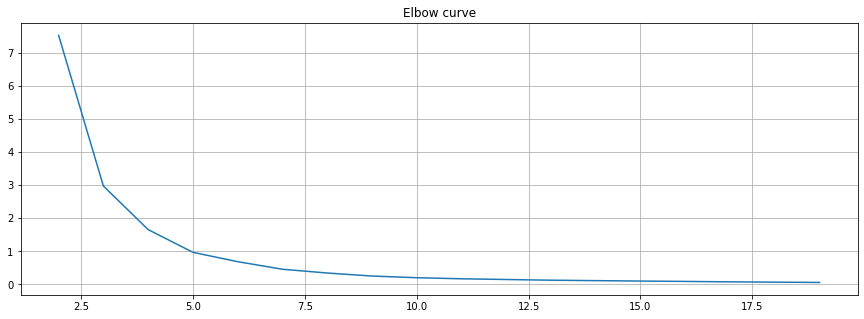

In [539]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

X = np.array(day[['latitude','longitude']])
#kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
distorsions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [540]:
X = np.array(day[['latitude','longitude']])
kmeans = KMeans(n_clusters=100, random_state=0).fit(X)
kmeans.labels_

array([19, 19, 19, ...,  4,  4,  4], dtype=int32)

In [541]:
import pickle
with open('kmeans.pickle', 'wb') as handle:
    pickle.dump(kmeans, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [542]:
print(np.array(Y).shape)
print(np.array(Y).shape)

(4900,)
(4900,)


In [543]:
Y = []
for i in range(0, X.shape[0]):
    Y.append((kmeans.predict([X[i]])[0]))

np.unique(Y)
#plt.plot(X,np.array(Y),'o')
 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int32)

In [544]:
dataset = pd.DataFrame({'path': day['path'], 'Column1': X[:, 0], 'Column2': X[:, 1],'Column3': Y})

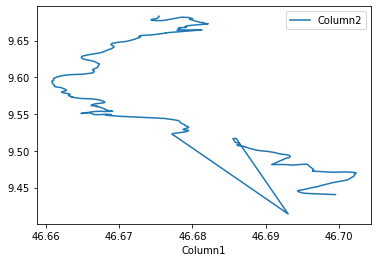

In [545]:
dataset.plot(x='Column1',y='Column2')

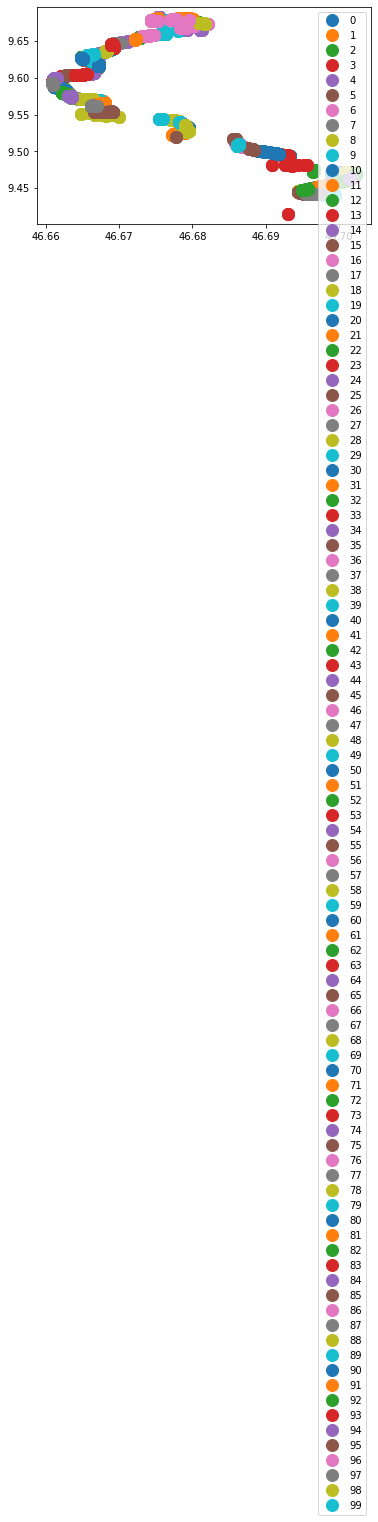

In [546]:
groups = dataset.groupby('Column3')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Column1, group.Column2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [547]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

In [548]:
# Load the pretrained model
model = models.resnet18(pretrained=True)
# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

In [549]:
# Set model to evaluation mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [550]:
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

/home/rosni/anaconda3/lib/python3.7/site-packages/torchvision/transforms/transforms.py:256: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [551]:
from torchsummary import summary
summary(model,(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
       BasicBlock-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1, 64,

In [552]:
def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data.reshape(o.data.size(1)))
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding

In [ ]:
feature_vectors = []
for i in range(day.shape[0]):
    feature_vectors.append(get_vector(day['path'][i]).numpy())

In [303]:
#fv = []
#for i in feature_vectors:
#    fv.append(i.numpy())

In [313]:
day["feature_vectors"] = feature_vectors
#day["feature_vectors"] = fv

In [283]:
fv_array = np.array(fv).shape

In [314]:
import pickle
with open('feature_vector.pickle', 'wb') as handle:
    pickle.dump(day, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#day.to_csv("nice_weather_thusis_filisur_withFeatureVector.csv")

In [562]:
#pic_one = str(input("Input first image name\n"))
#pic_two = str(input("Input second image name\n"))

#for i in range(100):
pic_one_vector = get_vector("Dataset_complete/Trackpictures/nice_weather/nice_weather_thusis_filisur_20200827_pixelated/image_00122.jpg")
pic_two_vector = get_vector("Dataset_complete/Trackpictures/bad_weather/bad_weather_thusis_filisur_20200829_pixelated/image_00001.jpg")

# Using PyTorch Cosine Similarity
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
cos_sim = cos(pic_one_vector.unsqueeze(0),
          pic_two_vector.unsqueeze(0))
print('\nCosine similarity: {0}\n'.format(cos_sim))



Cosine similarity: tensor([0.8819])



In [651]:
import piexif
import operator
import tensorflow as tf
import pickle

real_image = "Dataset_complete/Trackpictures/bad_weather/bad_weather_thusis_filisur_20200829_pixelated/image_03500.jpg"
with open('feature_vector.pickle', 'rb') as handle:
    day = pickle.load(handle)
with open('kmeans.pickle', 'rb') as handle:
    kmeans = pickle.load(handle)


def image_similarity(process_image,real_image):

    real_image_gps = []
    #day = pd.read_csv("nice_weather_thusis_filisur_withFeatureVector.csv")

    exif_dict = piexif.load(real_image)
    for tag in exif_dict["GPS"]:
        if(piexif.TAGS["GPS"][tag]["name"] in ["GPSLatitude","GPSLongitude"]):
            real_image_gps.append(exif_dict["GPS"][tag][0]/1000000.0)

    real_image_cluster = kmeans.predict([np.array(real_image_gps)])[0]
    
    real_image_feature_vector = get_vector(process_image)
    similar_images = {}

    for img_path in groups.get_group(real_image_cluster).path:
        image_vector = day.loc[day['path'] == img_path]['feature_vectors'].values[0]
        cos = nn.CosineSimilarity(dim=1, eps=1e-6)
        cos_sim = cos(real_image_feature_vector.unsqueeze(0),
              image_vector.unsqueeze(0))
        similar_images[img_path] = cos_sim

    similar_img_path = max(similar_images.items(), key=operator.itemgetter(1))[0]

    return similar_img_path

In [654]:
from shutil import copyfile

for i in range(1,99):
    file_name = 'night_testing_results/0-10sEqualization/image_037'+'{:02d}'.format(i)+'new0.jpg'
    file_name2 = 'Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_037'+'{:02d}'.format(i)+'.jpg'
    print(file_name2)
    copyfile(image_similarity(file_name,file_name2),'frame_predict/frame_predict_'+str(i)+'.jpg')

Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03701.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03702.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03703.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03704.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03705.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03706.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03707.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03708.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03709.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03710.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03711.jpg
Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/image_03712.jpg
Data

In [625]:
HackZurich2020/night_testing_results/0-10s_ALLChannelsClahe/image_03701new0.jpg